# P3

## Autocorrelation

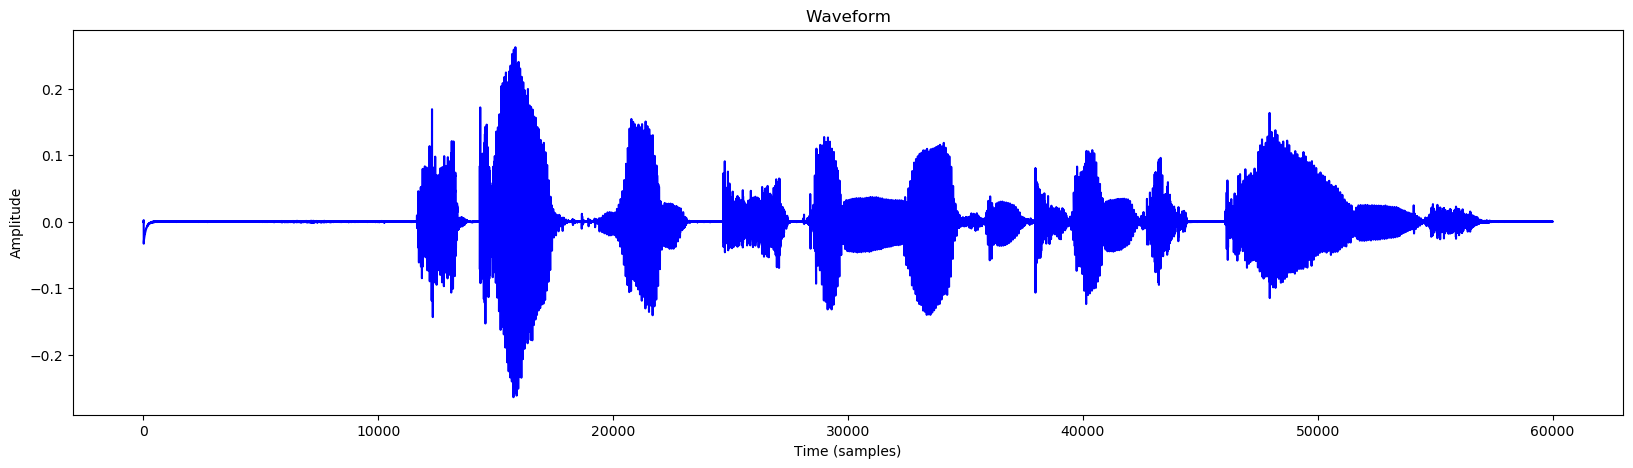

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

filename = "../prueba.wav"
wav_file, sample_rate = sf.read(filename)

plt.figure(figsize=(20, 5))
plt.plot(wav_file, color='b')
plt.title('Waveform')
plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.show()

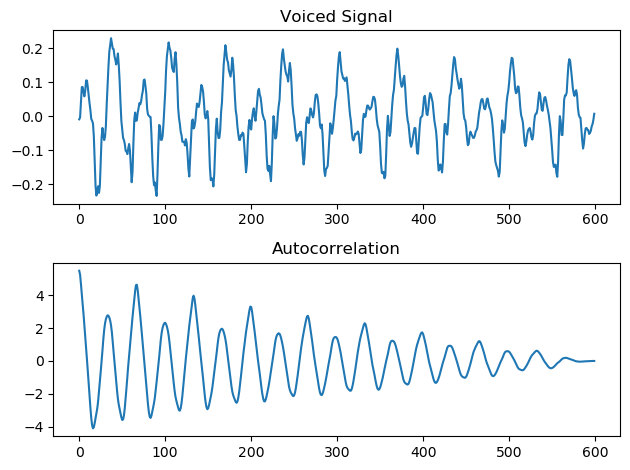

In [28]:
voiced_timestpamp = 16000

segment_samples = round(sample_rate*30/1000)
signal = wav_file[voiced_timestpamp:voiced_timestpamp+segment_samples]
autocorrelation = np.correlate(signal, signal, mode='full')
autocorrelation = autocorrelation[autocorrelation.size // 2:]

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Voiced Signal')

plt.subplot(2, 1, 2)
plt.plot(autocorrelation)
plt.title('Autocorrelation')

plt.tight_layout()
plt.show()

## Voiced sound

In [ ]:
def calculate_window_power(signal, n_samples, overlap):

    # Calculate the step size based on the overlap percentage
    step = int(n_samples * (1 - overlap))

    # Initialize an empty array to store the powers
    powers = []

    # Iterate over the signal with the specified step size
    for i in range(0, len(signal) - n_samples + 1, step):
        # Extract the current window
        window = signal[i:i + n_samples]

        # Compute the autocorrelation of the window
        autocorr = np.correlate(window, window, mode='full')

        # Extract the autocorrelation value at lag 0 (power of the window)
        power = autocorr[len(window) - 1]

        # Store the power value
        powers.append(power)

    return np.array(powers)

0
24
50
45
0
61
10
2
2
2
1
1
2
2
3
35
49
139
36
2
133
58
57
22
42
48
47
47
50
71
74
236
81
58
55
56
58
64
76
0
0
47
7
12
92
27
9
56
62
63
65
64
63
62
59
58
59
60
79
43
62
61
61
14
0
5
59
62
64
63
62
81
3
43
4
0
13
56
59
60
63
66
69
72
73
74
75
75
73
66
68
36
0
58
20
62
56
264
23
8


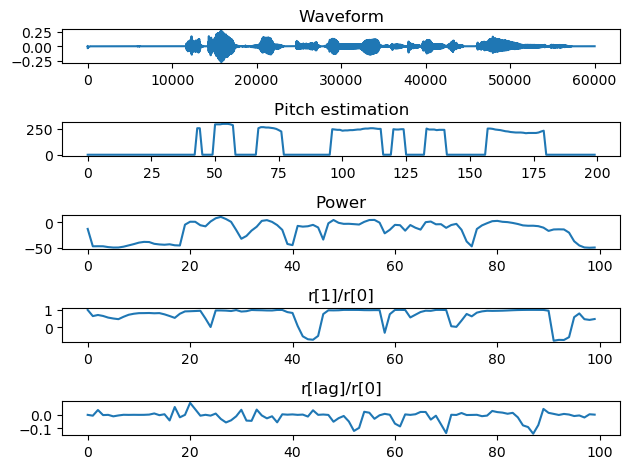

In [41]:
from numpy import loadtxt

n_pitch_min = sample_rate/1000

pitch = loadtxt('../prueba.f0')

r_lag = []
r1 = []
power = []
for i in range(0, len(wav_file) - segment_samples + 1, segment_samples):
    signal = wav_file[i:i+segment_samples]
    autocorrelation = np.correlate(signal, signal, mode='full')

    pow = autocorrelation[autocorrelation.size // 2]
    pow1 = autocorrelation[autocorrelation.size // 2 + 1]
    lag = np.argmax(autocorrelation[autocorrelation.size // 2 + int(n_pitch_min):])

    power.append(pow)
    r1.append(pow1/pow)
    print(lag)
    # TODO
    r_lag.append(autocorrelation[lag]/pow)


power_dB = 10 * np.log10(power)

plt.figure()

plt.subplot(5, 1, 1)
plt.plot(wav_file)
plt.title('Waveform')

plt.subplot(5, 1, 2)
plt.plot(pitch)
plt.title('Pitch estimation')

plt.subplot(5, 1, 3)
plt.plot(power_dB)
plt.title('Power')

plt.subplot(5, 1, 4)
plt.plot(r1)
plt.title('r[1]/r[0]')

plt.subplot(5, 1, 5)
plt.plot(r_lag)
plt.title('r[lag]/r[0]')

plt.tight_layout()
plt.show()